# Training and inference of a YoloV5 model
For detailed documentation on how to train a model, see: https://docs.ultralytics.com/yolov5/

Training a custom YOLOV5 model requires several steps:
0. Pull the YOLOv5 Git Repo: https://github.com/ultralytics/yolov5/releases

1. Creating a custom dataset
    Images (JPEG) and labels (TXT) must be collected and properly formatted. See: https://roboflow.com/formats/yolov5-pytorch-txt
    
2. Select a model. Several types of Yolo models are available (e.g., Nano: YoloV5n ... Medium: YoloV5m ... XLarge: YoloV5X). In general, larger models perform better, but are slower for training and inference. https://docs.ultralytics.com/models/

3. Train the model. Setup a Conda/Python environment (here: Python 3.10; Pytorch with CUDA GPU enabled). Create YAML files specifying where to find the data, and what model architecture you are using. You can also specify different hyperparameters during model training.

With your conda environment active, run your model: 

python train.py --single-cls --rect --batch -1 --epochs 25 --data ./datasets/autoarborist_file_paths_classes_yolov5x.yml --cfg ./datasets/autoarborist_architecture_yolov5x.yml --weights '' --hyp ./datasets/hyp-scratch-custom.yaml

--single-cls specifies training with one class
--rect specifies images are rectangular (from the Autoarborist dataset)
--batch -1 specifies automatic batch size selection
--epochs 25 specifies total number of iterations through the entire training/testing set
--data points to the YAML file with your training data paths
--cfg points to the YAML file with your model architecture 
--weights specifies whether you want pre-trained weights
--hyp points to the YAML file with your hyperparameters

Once you train the model... you can view summary statistics (precision, recall) and evaluate it's performance.

# Import Libraries

In [ ]:
# Folloiwng guides: https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/#before-you-start

import torch
import matplotlib.pyplot as plt
import os
import shutil


# Inference using a trained YOLOv5 Object Detection Model

In [7]:
# Load a pretrained/ custom model from disk

model = torch.hub.load(r'C:/Users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5', 'custom', path=r'C:/Users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/runs/train/yolov5x-oct2323-autoarborist-25epochs/weights/last.pt', source='local')



YOLOv5  v7.0-226-gdd9e338 Python-3.11.4 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
autoarborist_architecture_YOLOv5x summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


# Inference on a single image

In [8]:
# Define an image and apply the model for inference

image = r'C:/Users/talake2/Desktop/Screenshot.jpeg'

results = model(image)



# Inference on a directory of images

In [ ]:
# Define an image to apply the model inference to each image in the directory

input_image_directory = r'C:/Users/talake2/Desktop/GSV_imgs_ailanthus/imgs'

for filename in os.listdir(input_image_directory):
    if filename.endswith('.jpg'):
         # Construct the full file path
        image_path = os.path.join(input_image_directory, filename)
        
        # Run model inference on the image (replace this with your actual model inference code)
        results = model(image_path)

         # Save the plotted image with results
        results.save()
        
    


In [ ]:
# After inference, move output files to single directory

# Source directory containing 'exp', 'exp1', 'exp2', ... folders
source_directory = r'C:/Users/talake2/Desktop/auto_arborist_cvpr2022_v015/jupyter_notebooks/runs/detect'

# Destination directory where all JPEG files will be moved
destination_directory = r'C:/Users/talake2/Desktop/GSV_imgs_ailanthus/imgs/yolo_predictions_rhus_typhina'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Recursively traverse through the source directory and move JPEG files
for root, _, files in os.walk(source_directory):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg'):
            # Get the full path of the JPEG file
            source_file_path = os.path.join(root, file)
            # Move the file to the destination directory
            shutil.move(source_file_path, os.path.join(destination_directory, file))

print("JPEG files moved successfully to the destination directory.")



# Output model results (bounding boxes, confidence scores, class labels)

In [9]:
# Examine results. Show number of bounding boxes and details of an image.

results.print()

results.pandas().xyxy[0]



image 1/1: 976x2113 7 trees
Speed: 27.8ms pre-process, 36.0ms inference, 1.0ms NMS per image at shape (1, 3, 320, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,1588.548340,411.751282,1803.879883,763.573669,0.886122,0,tree
1,1649.819214,177.548965,2112.324707,936.020630,0.832807,0,tree
2,588.974243,25.303717,982.889832,803.686462,0.776768,0,tree
3,1.202444,23.736235,539.590698,825.955627,0.705078,0,tree
4,961.078735,273.453552,1199.843994,770.320312,0.618788,0,tree
5,336.067108,20.704849,696.119263,788.369629,0.509345,0,tree
6,1877.343628,180.027191,2113.000000,399.144226,0.362188,0,tree


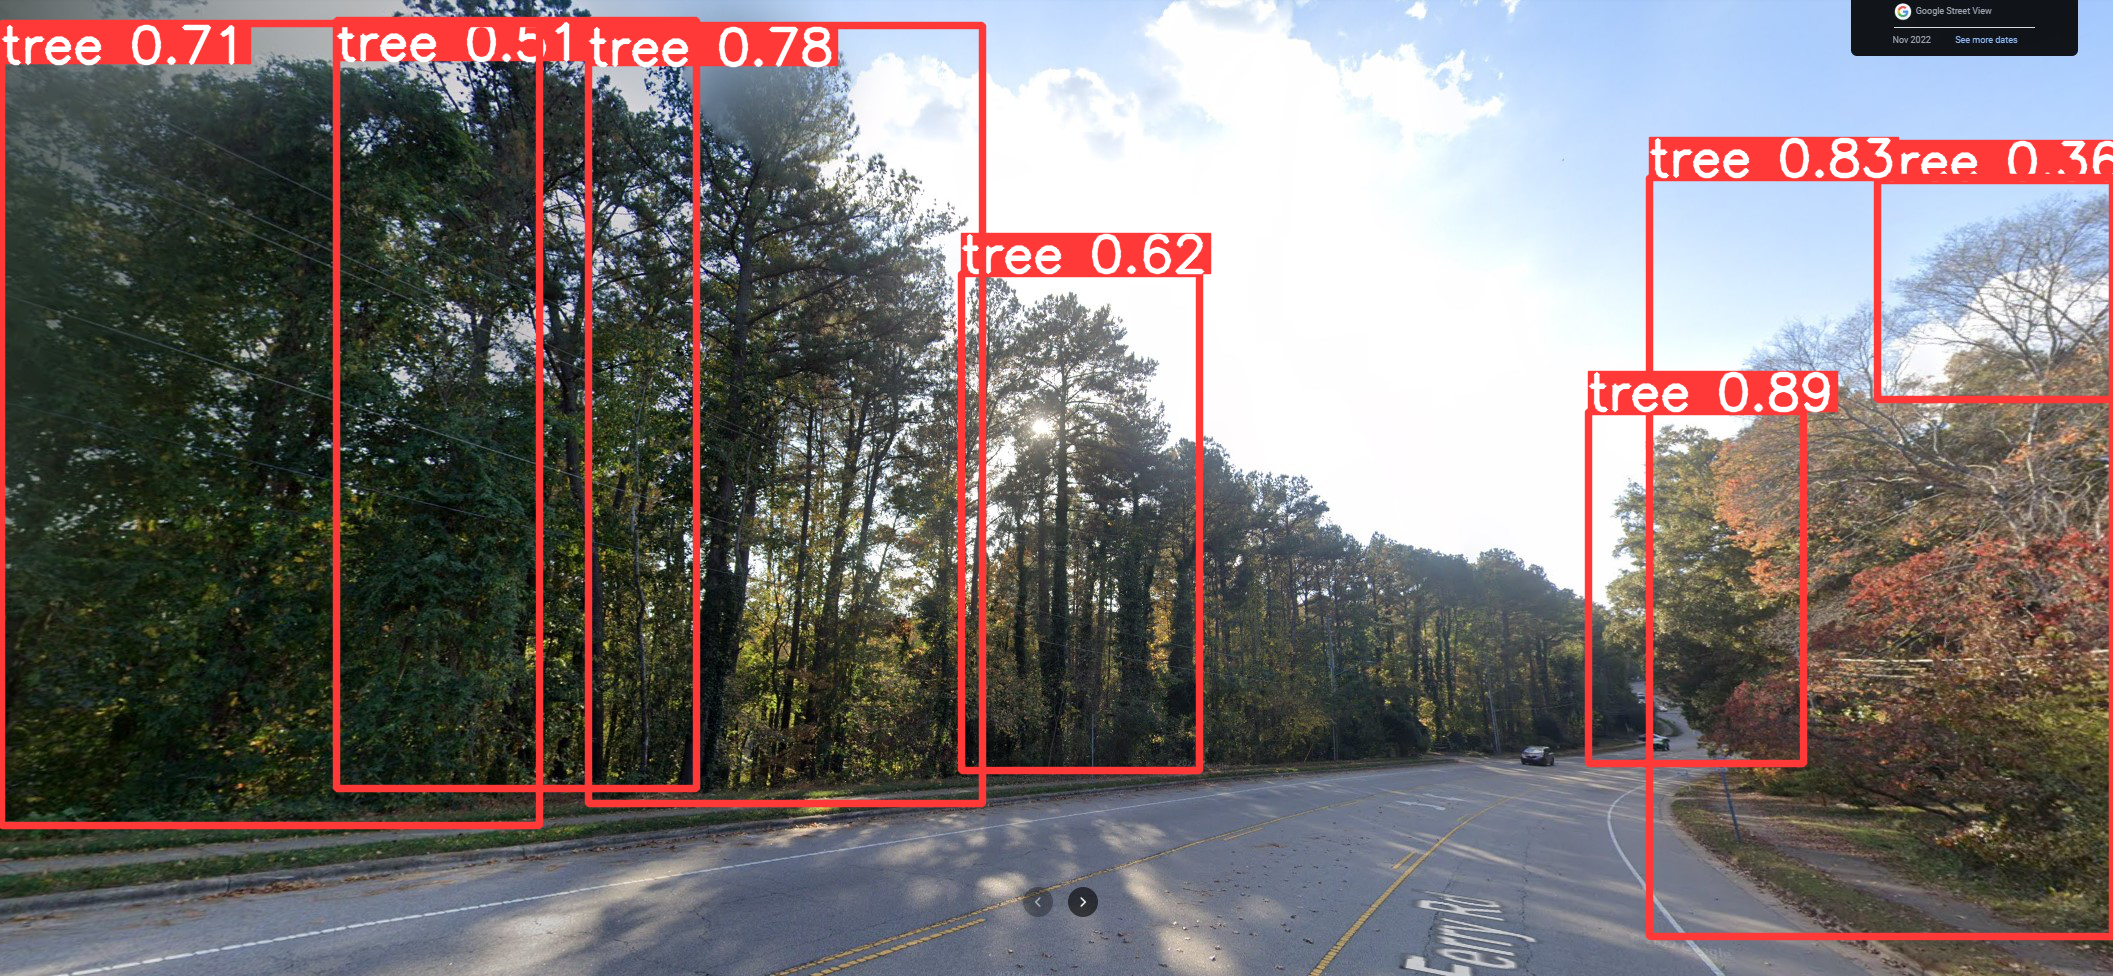

In [10]:
# Display full image results

results.show()


# Diagnostics: Check if all training/testing images: label pairs are present.

Each image (e.g.,  000038a4-b9a1-4e11-9e92-e8a98a3ebdb7.jpg ) should have a unique, matching label (e.g., 000038a4-b9a1-4e11-9e92-e8a98a3ebdb7.txt)

If an image is missing a label, or if we have extra labels, delete these data.

In [14]:

import os

# Paths to the image and label folders
image_folder = r'/mnt/c/users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/datasets/autoarborist/train/images'
label_folder = r'/mnt/c/users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/datasets/autoarborist/train/labels'

# Get the list of image files
image_files = os.listdir(image_folder)

#print(image_files[0:10])

# Get the list of label files
label_files = os.listdir(label_folder)

#print(label_files[0:10])

# Iterate through image files
for image_file in image_files:
    # Construct the corresponding label file name
    label_file = os.path.splitext(image_file)[0] + '.txt'
    
    # Check if the label file exists
    if label_file not in label_files:
        # If label file doesn't exist, remove the image file
        os.remove(os.path.join(image_folder, image_file))
        print(f"Removed {image_file} because corresponding label was not found.")

# Iterate through label files
for label_file in label_files:
    # Construct the corresponding image file name
    image_file = os.path.splitext(label_file)[0] + '.jpeg'
    
    # Check if the image file exists
    if image_file not in image_files:
        # If image file doesn't exist, remove the label file
        os.remove(os.path.join(label_folder, label_file))
        print(f"Removed {label_file} because corresponding image was not found.")



# Paths to the image and label folders
image_folder = r'/mnt/c/users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/datasets/autoarborist/test/images'
label_folder = r'/mnt/c/users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/datasets/autoarborist/test/labels'

# Get the list of image files
image_files = os.listdir(image_folder)

#print(image_files[0:10])

# Get the list of label files
label_files = os.listdir(label_folder)

#print(label_files[0:10])

# Iterate through image files
for image_file in image_files:
    # Construct the corresponding label file name
    label_file = os.path.splitext(image_file)[0] + '.txt'
    
    # Check if the label file exists
    if label_file not in label_files:
        # If label file doesn't exist, remove the image file
        os.remove(os.path.join(image_folder, image_file))
        print(f"Removed {image_file} because corresponding label was not found.")

# Iterate through label files
for label_file in label_files:
    # Construct the corresponding image file name
    image_file = os.path.splitext(label_file)[0] + '.jpeg'
    
    # Check if the image file exists
    if image_file not in image_files:
        # If image file doesn't exist, remove the label file
        os.remove(os.path.join(label_folder, label_file))
        print(f"Removed {label_file} because corresponding image was not found.")





FileNotFoundError: [WinError 3] The system cannot find the path specified: '/mnt/c/users/talake2/Desktop/auto_arborist_cvpr2022_v015/yolov5/datasets/autoarborist/train/images'